In [17]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
# subjects under analysis
subjects = os.listdir("./Data/")
print(subjects)

['PAT20', 'PAT24', 'CON09', 'CON01', 'PAT13', 'CON03', 'CON08', 'PAT08', 'PAT14', 'PAT17', 'PAT19', 'CON02', 'PAT23', 'CON07', 'PAT03', 'PAT11', 'PAT25', 'PAT05', 'CON05', 'PAT15', 'CON04', 'PAT07', 'PAT16', 'PAT01', 'PAT06', 'CON06', 'PAT22', 'CON10', 'CON11', 'PAT02', 'PAT10']


In [19]:
def get_path(estimation, subject):
    return "./Data/" + subject + "/Output_" + estimation + "/"

In [4]:
G = sorted([i/10 + 0.01 for i in range(0, 32, 2)], reverse=True)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


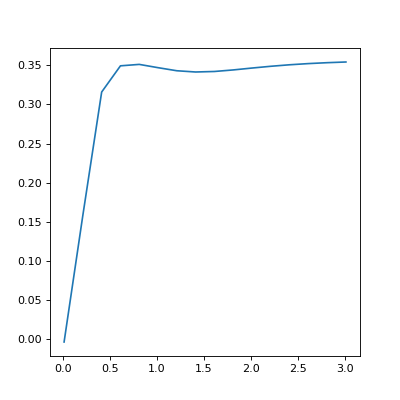

In [5]:
# getting the correlation vs G plot for a single subject
%pylab nbagg
plt.rcParams['figure.figsize'] = [5, 5]
temp = np.loadtxt(get_path("canon2dd", "CON01")+"PCorr.txt",delimiter="\n")
plt.plot(G, temp)
plt.show()

In [6]:
# getting the max for each estimation stratergy
CON = []
PAT = []
CANON = [[], []]
FOURIER = [[], []]
GAMMA = [[], []]
LEGACY = [[], []]
for each in subjects:
    if "CON" in each:
        CANON[0].append(np.max(np.loadtxt(get_path("canon2dd", each)+"PCorr.txt",delimiter="\n")))
        FOURIER[0].append(np.max(np.loadtxt(get_path("fourier", each)+"PCorr.txt",delimiter="\n")))
        GAMMA[0].append(np.max(np.loadtxt(get_path("gamma", each)+"PCorr.txt",delimiter="\n")))
        LEGACY[0].append(np.max(np.loadtxt(get_path("legacy", each)+"PCorr.txt",delimiter="\n")))
        CON.append(each)
    elif "PAT" in each:
        CANON[1].append(np.max(np.loadtxt(get_path("canon2dd", each)+"PCorr.txt",delimiter="\n")))
        FOURIER[1].append(np.max(np.loadtxt(get_path("fourier", each)+"PCorr.txt",delimiter="\n")))
        GAMMA[1].append(np.max(np.loadtxt(get_path("gamma", each)+"PCorr.txt",delimiter="\n")))
        LEGACY[1].append(np.max(np.loadtxt(get_path("legacy", each)+"PCorr.txt",delimiter="\n")))
        PAT.append(each)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


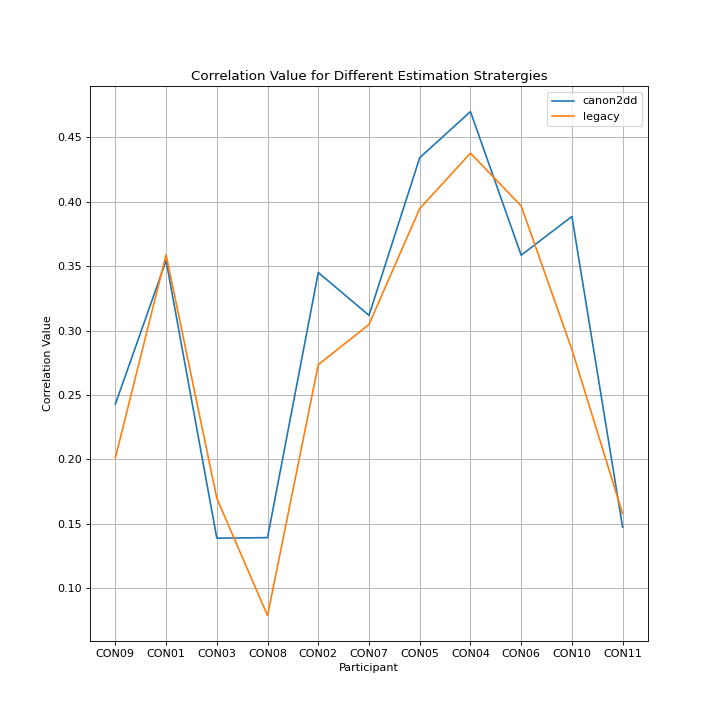

In [7]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [9, 9]
plt.grid()
plt.plot(CON, CANON[0], label="canon2dd")
# plt.plot(CON, FOURIER[0], label="fourier")
# plt.plot(CON, GAMMA[0], label="gamma")
plt.plot(CON, LEGACY[0], label="legacy")
plt.xlabel("Participant")
plt.ylabel("Correlation Value")
plt.title("Correlation Value for Different Estimation Stratergies")
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


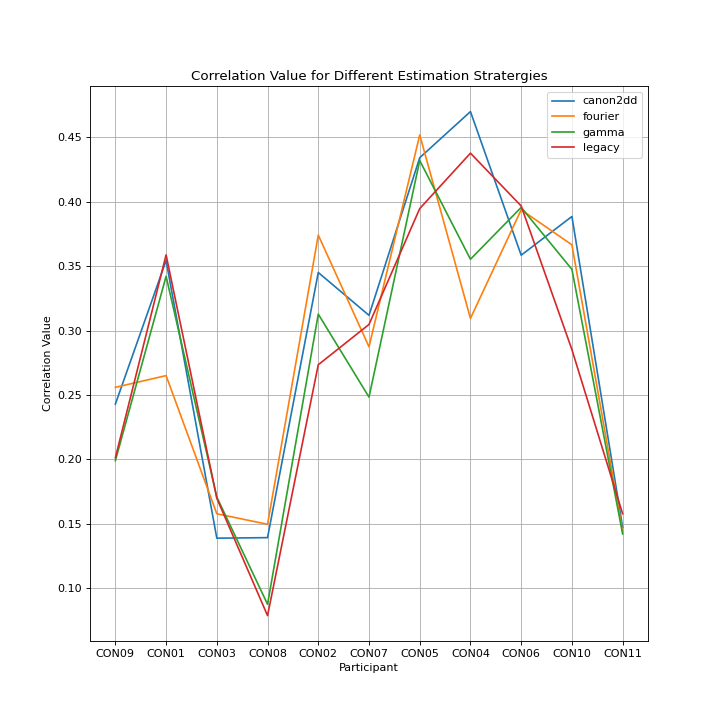

In [8]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [9, 9]
plt.grid()
plt.plot(CON, CANON[0], label="canon2dd")
plt.plot(CON, FOURIER[0], label="fourier")
plt.plot(CON, GAMMA[0], label="gamma")
plt.plot(CON, LEGACY[0], label="legacy")
plt.xlabel("Participant")
plt.ylabel("Correlation Value")
plt.title("Correlation Value for Different Estimation Stratergies")
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


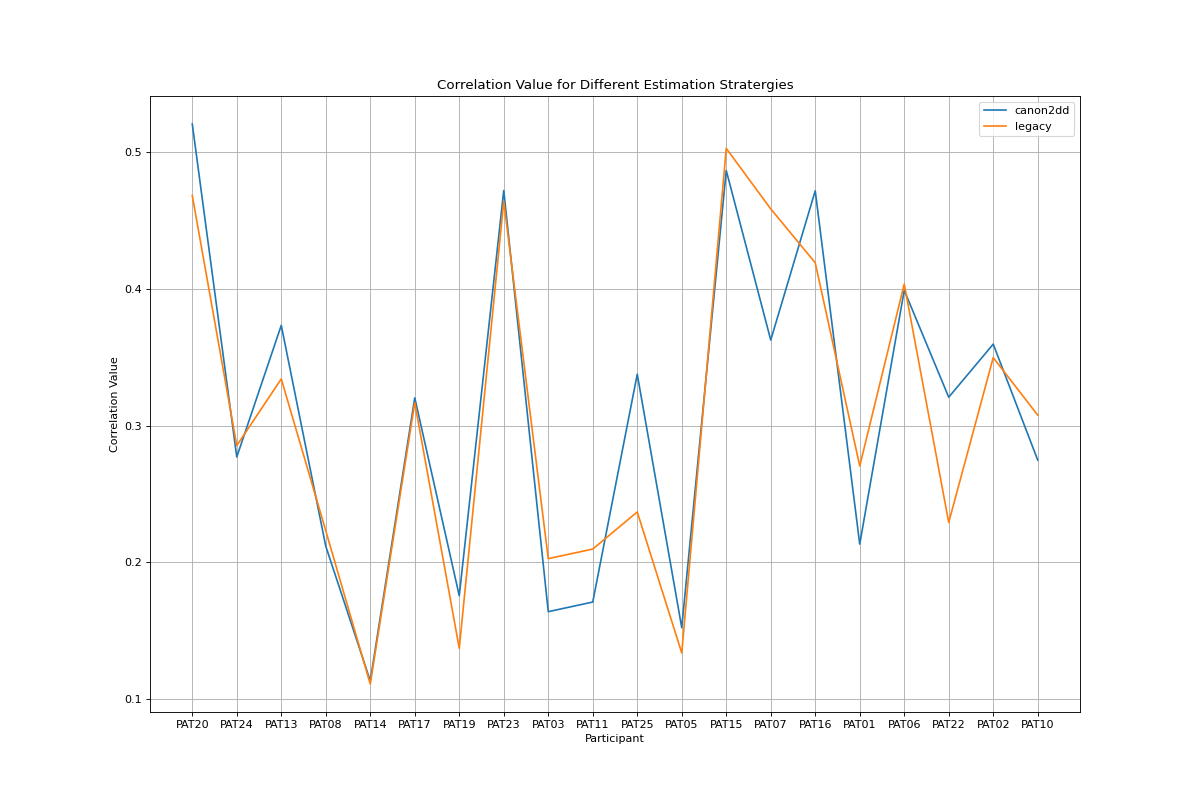

In [9]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.plot(PAT, CANON[1], label="canon2dd")
# plt.plot(CON, FOURIER[0], label="fourier")
# plt.plot(CON, GAMMA[0], label="gamma")
plt.plot(PAT, LEGACY[1], label="legacy")
plt.xlabel("Participant")
plt.ylabel("Correlation Value")
plt.title("Correlation Value for Different Estimation Stratergies")
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


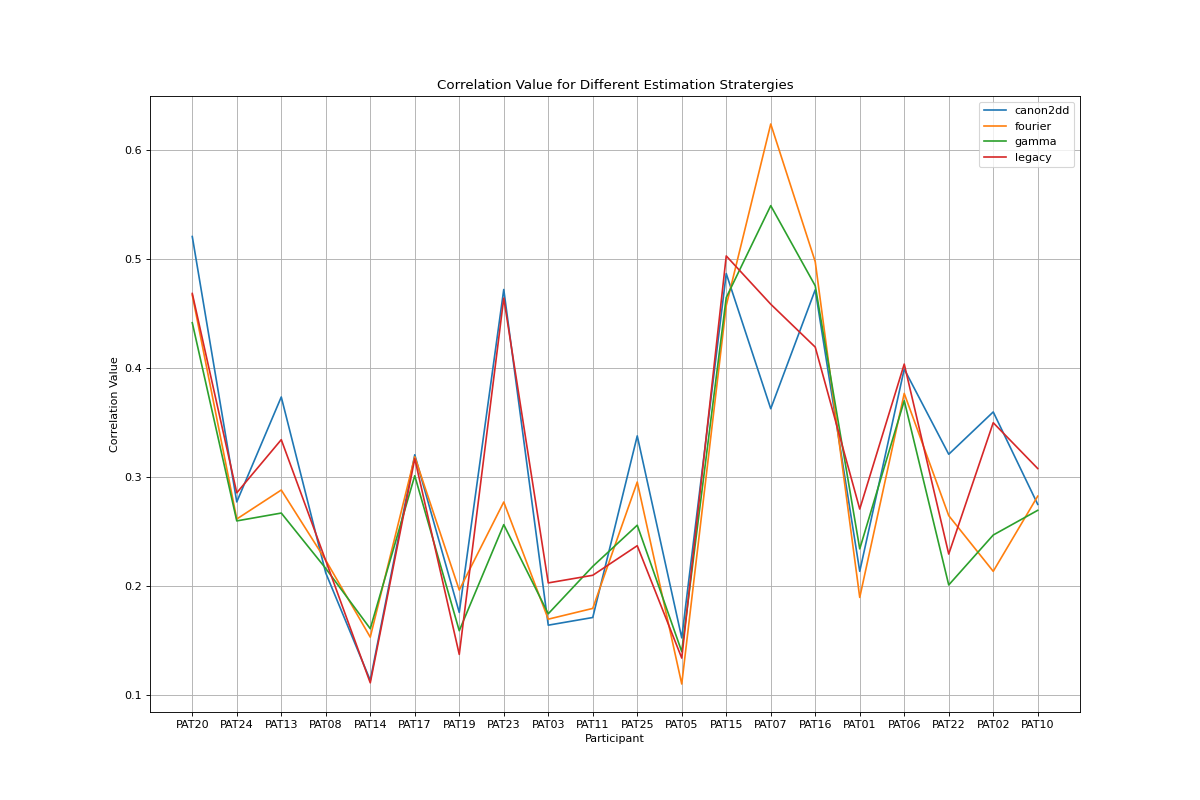

In [10]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.plot(PAT, CANON[1], label="canon2dd")
plt.plot(PAT, FOURIER[1], label="fourier")
plt.plot(PAT, GAMMA[1], label="gamma")
plt.plot(PAT, LEGACY[1], label="legacy")
plt.xlabel("Participant")
plt.ylabel("Correlation Value")
plt.title("Correlation Value for Different Estimation Stratergies")
plt.legend()
plt.show()

In [11]:
# getting average correlation
legacy = LEGACY[0] + LEGACY[1]
rsHRF = []
for i in range(len(CANON[0])):
    rsHRF.append([np.max([CANON[0][i], FOURIER[0][i], GAMMA[0][i]])])
for i in range(len(CANON[1])):
    rsHRF.append([np.max([CANON[1][i], FOURIER[1][i], GAMMA[1][i]])])
print("Average Correlation Values: ")
print("Across All Participants")
print("Legacy: ", sum(legacy)/len(legacy))
print("rsHRF: ", sum(rsHRF)/len(rsHRF))
print("Across Control Subjects")
print("Legacy: ", sum(legacy[:11])/len(legacy[:11]))
print("rsHRF: ", sum(rsHRF[:11])/len(rsHRF[:11]))
print("Across Patients")
print("Legacy: ", sum(legacy[11:])/len(legacy[11:]))
print("rsHRF: ", sum(rsHRF[11:])/len(rsHRF[11:]))

Average Correlation Values: 
Across All Participants
Legacy:  0.29431017706630647
rsHRF:  0.32580739861337427
Across Control Subjects
Legacy:  0.27805316134962943
rsHRF:  0.3154119636000515
Across Patients
Legacy:  0.30325153571047886
rsHRF:  0.33152488787070167


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


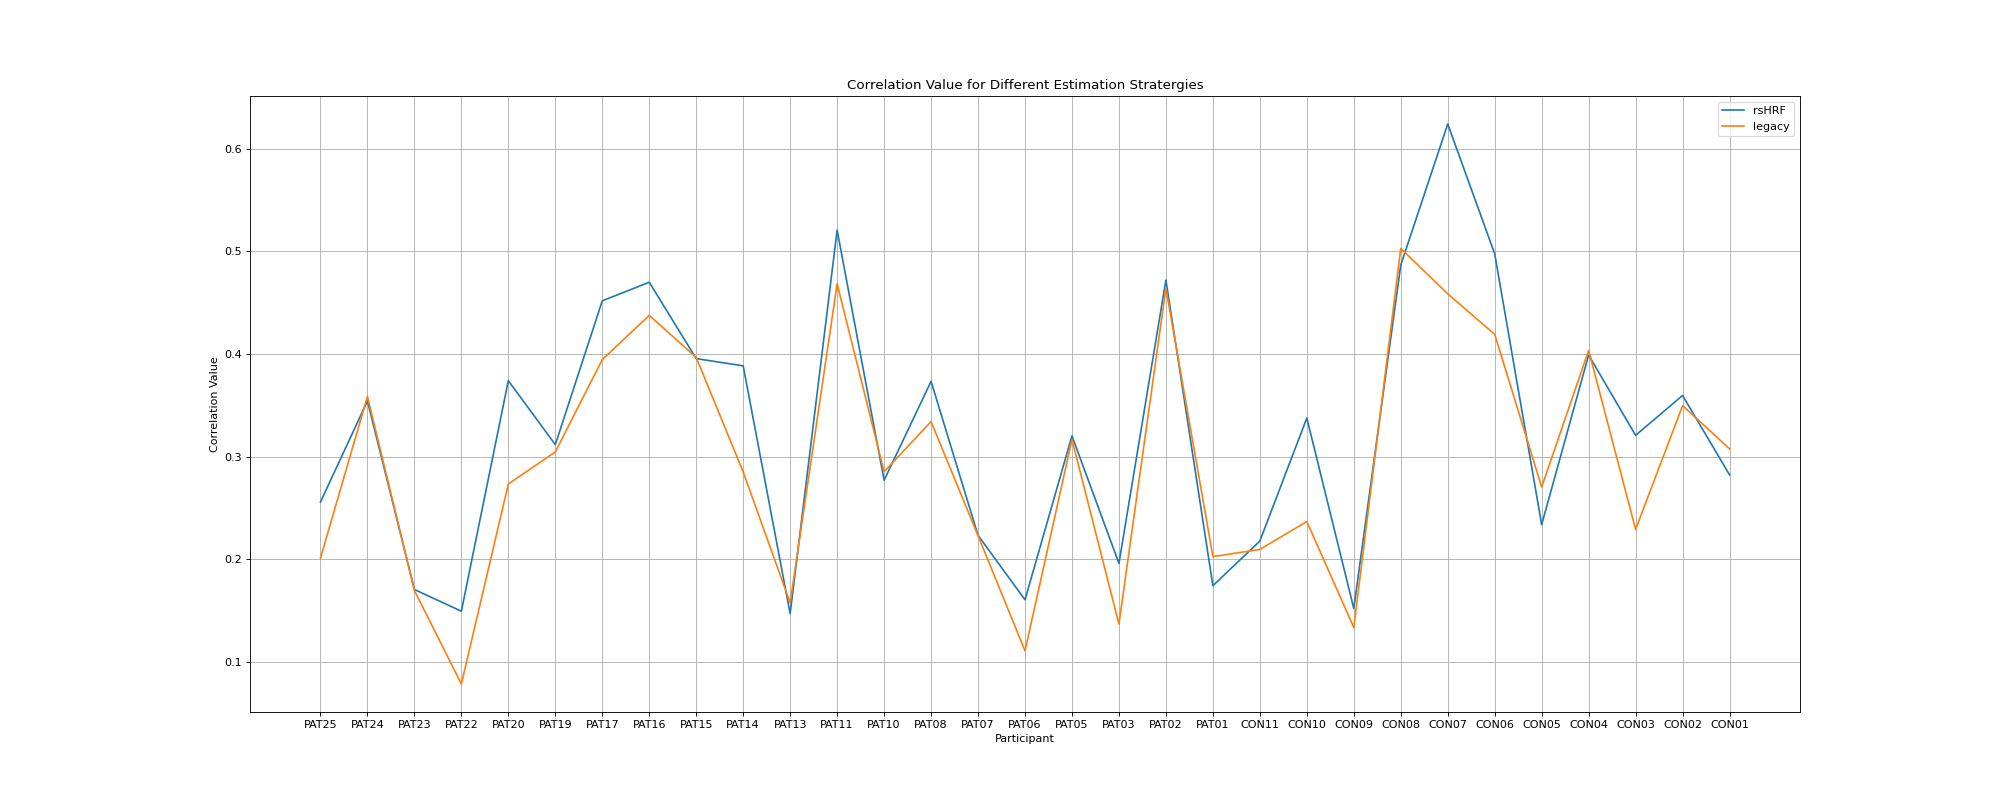

In [16]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [25, 10]
plt.grid()
plt.plot(subjects, rsHRF, label="rsHRF")
plt.plot(subjects, legacy, label="legacy")
plt.xlabel("Participant")
plt.ylabel("Correlation Value")
plt.title("Correlation Value for Different Estimation Stratergies")
plt.legend()
plt.show()

In [13]:
PCorr = []
J_i = []
G = G
estimation = ['canon2dd', 'fourier', 'gamma']
for each in subjects:
    temp = []
    for e in estimation:
        temp.append(np.max(np.loadtxt(get_path(e, each)+"PCorr.txt",delimiter="\n")))
    PCorr.append(np.loadtxt(get_path(estimation[np.argmax(temp)],each)+"PCorr.txt", delimiter="\n"))
    J_i.append(np.median(np.loadtxt(get_path(estimation[np.argmax(temp)], each)+"J_i.txt"), axis=0))
PCorr = np.array(PCorr)
J_i = np.array(J_i)
G = np.array(G)

Populating the interactive namespace from numpy and matplotlib


/home/redhood/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


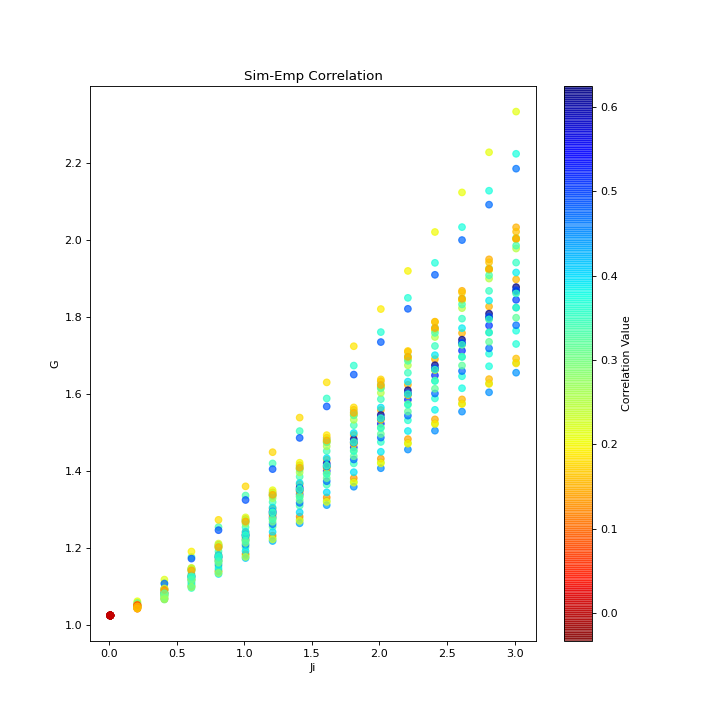

In [14]:
%pylab nbagg
max_ = 0.0
min_ = 1.0
cmap = plt.get_cmap("jet_r")
plt.rcParams['figure.figsize'] = [9, 9]
for i in range(PCorr.shape[0]):
    if np.max(PCorr[i]) > max_:
        max_ = np.max(PCorr[i])
    if np.min(PCorr[i]) < min_:
        min_ = np.min(PCorr[i])
for i in range(PCorr.shape[0]):
    plt.scatter(G, J_i[i], c=PCorr[i], cmap=cmap, vmax=max_, vmin=min_, alpha=0.7)
plt.ylabel("G")
plt.xlabel("Ji")
plt.title("Sim-Emp Correlation")
plt.colorbar().set_label("Correlation Value")
plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


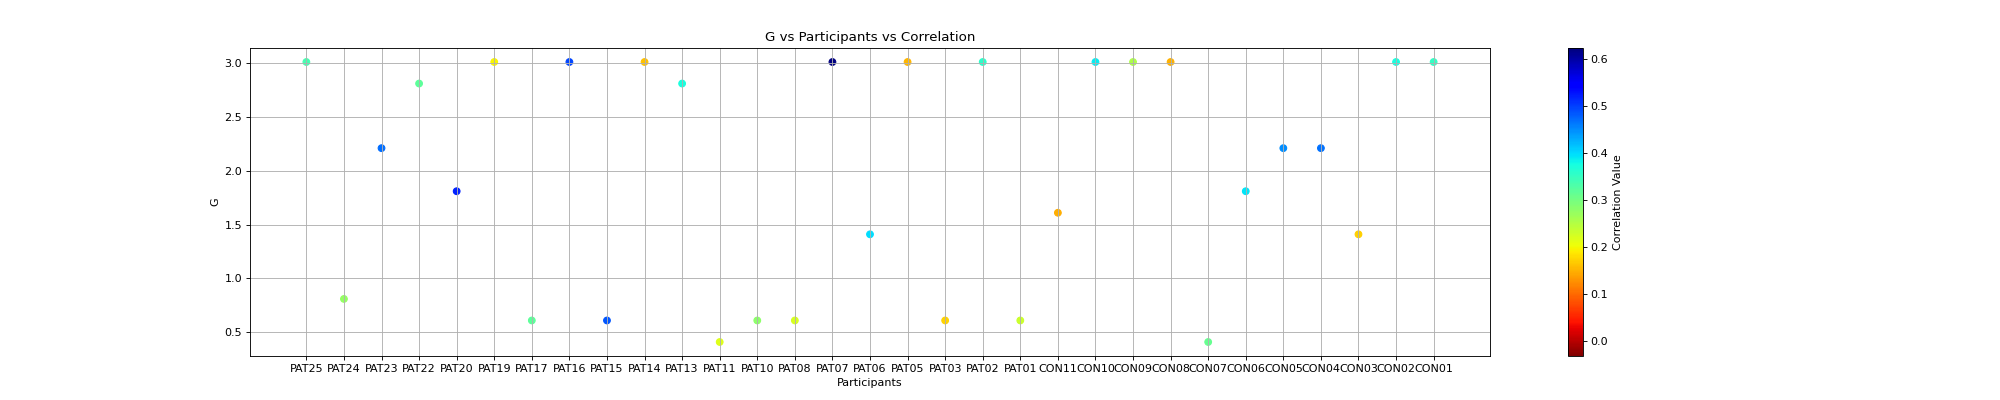

In [15]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [25, 5]
subjects = np.array(subjects)
PCorr = np.array(PCorr)
subIds = subjects.argsort()
subjects = subjects[subIds[::-1]]
PCorr = PCorr[subIds[::-1]]
plt.grid()
G_max = []
for i in range(PCorr.shape[0]):
    G_max.append((3.0 - 0.2*np.argmax(PCorr[i])) + 0.01)
plt.scatter(subjects, G_max, c=np.max(PCorr, axis=1), cmap=cmap, vmax=max_, vmin=min_)
plt.ylabel("G")
plt.xlabel("Participants")
plt.title("G vs Participants vs Correlation")
plt.colorbar().set_label("Correlation Value")
plt.show()